In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import pandas as pd
# import numpy as np

# # Function to classify soil type based on given conditions (for reference)
# def classify_soil_type(organic_carbon, soil_color, ph_level, soil_drainage, texture_class):
#     conditions = {
#         'Sandy soil': lambda oc, sc, ph, sd, tc: 0.5 <= oc <= 2.5 and sc in ['Pale yellow', 'Light brown'] and 5.5 <= ph <= 7.5 and sd == 'Well-Drained' and tc == 'Sandy',
#         'Loam soil': lambda oc, sc, ph, sd, tc: 2.0 <= oc <= 5.0 and sc in ['Dark brown', 'Brown'] and 6.0 <= ph <= 7.5 and sd in ['Well-Drained', 'Moderately-Drained'] and tc == 'Loamy',
#         'Silt soil': lambda oc, sc, ph, sd, tc: 1.5 <= oc <= 4.0 and sc == 'Light brown' and 6.0 <= ph <= 8.0 and sd in ['Well-Drained', 'Moderately-Drained'] and tc == 'Loamy',
#         'Clay soil': lambda oc, sc, ph, sd, tc: 0.5 <= oc <= 2.0 and sc in ['Grey', 'Light brown'] and 7.0 <= ph <= 8.5 and sd == 'Moderately-Drained' and tc == 'Clayey',
#         'Peat soil': lambda oc, sc, ph, sd, tc: oc > 5.0 and sc in ['Dark brown', 'Black'] and 3.5 <= ph <= 5.5 and sd in ['Well-Drained', 'Moderately-Drained'] and tc == 'Peaty',
#         'Saline soil': lambda oc, sc, ph, sd, tc: 7.0 <= ph <= 8.5 and sd in ['Moderately-Drained', 'Poorly-Drained'] and tc == 'Saline',
#         'Alkaline soil': lambda oc, sc, ph, sd, tc: 0.5 <= oc <= 1.5 and sc in ['Pale yellow', 'Light brown'] and 8.0 <= ph <= 9.0 and sd in ['Well-Drained', 'Moderately-Drained'] and tc == 'Alkaline'
#     }
    
#     for soil_type, condition_func in conditions.items():
#         if condition_func(organic_carbon, soil_color, ph_level, soil_drainage, texture_class):
#             return soil_type
    
#     return 'Unknown'  # Shouldn't reach here if data is generated correctly

# # Remove fixed seed to ensure different random values each time
# np.random.seed(None)  # Remove the seed to get different values each run

# # Define soil type conditions
# soil_types = {
#     'Sandy soil': {'Organic Carbon (%)': (0.5, 2.5), 'Soil Color': ['Pale yellow', 'Light brown'], 'pH Level': (5.5, 7.5), 'Soil Drainage': 'Well-Drained', 'Texture Class': 'Sandy'},
#     'Loam soil': {'Organic Carbon (%)': (2.0, 5.0), 'Soil Color': ['Dark brown', 'Brown'], 'pH Level': (6.0, 7.5), 'Soil Drainage': ['Well-Drained', 'Moderately-Drained'], 'Texture Class': 'Loamy'},
#     'Silt soil': {'Organic Carbon (%)': (1.5, 4.0), 'Soil Color': 'Light brown', 'pH Level': (6.0, 8.0), 'Soil Drainage': ['Well-Drained', 'Moderately-Drained'], 'Texture Class': 'Loamy'},
#     'Clay soil': {'Organic Carbon (%)': (0.5, 2.0), 'Soil Color': ['Grey', 'Light brown'], 'pH Level': (7.0, 8.5), 'Soil Drainage': 'Moderately-Drained', 'Texture Class': 'Clayey'},
#     'Peat soil': {'Organic Carbon (%)': (5.0, 10.0), 'Soil Color': ['Dark brown', 'Black'], 'pH Level': (3.5, 5.5), 'Soil Drainage': ['Well-Drained', 'Moderately-Drained'], 'Texture Class': 'Peaty'},
#     'Saline soil': {'Organic Carbon (%)': (0.5, 2.0), 'Soil Color': ['Light brown', 'Grey'], 'pH Level': (7.0, 8.5), 'Soil Drainage': ['Moderately-Drained', 'Poorly-Drained'], 'Texture Class': 'Saline'},
#     'Alkaline soil': {'Organic Carbon (%)': (0.5, 1.5), 'Soil Color': ['Pale yellow', 'Light brown'], 'pH Level': (8.0, 9.0), 'Soil Drainage': ['Well-Drained', 'Moderately-Drained'], 'Texture Class': 'Alkaline'}
# }

# # Generate sample data ensuring each soil type has valid conditions
# data = []

# # Loop through each soil type to generate sample data
# for soil_type, conditions in soil_types.items():
#     # Generate 5 samples for each soil type to create a more diverse dataset
#     for _ in range(300):
#         oc_range = conditions['Organic Carbon (%)']
#         ph_range = conditions['pH Level']
        
#         # Sample values within the specified ranges
#         oc = np.random.uniform(*oc_range) if isinstance(oc_range, tuple) else oc_range
#         ph = np.random.uniform(*ph_range) if isinstance(ph_range, tuple) else ph_range
#         soil_color = np.random.choice(conditions['Soil Color']) if isinstance(conditions['Soil Color'], list) else conditions['Soil Color']
#         soil_drainage = np.random.choice(conditions['Soil Drainage']) if isinstance(conditions['Soil Drainage'], list) else conditions['Soil Drainage']
#         texture_class = conditions['Texture Class']
        
#         # Append the row
#         data.append({
#             'Organic Carbon (%)': round(oc, 2),
#             'Soil Color': soil_color,
#             'pH Level': round(ph, 2),
#             'Soil Drainage': soil_drainage,
#             'Texture Class': texture_class,
#             'Soil Type': soil_type  # Target variable
#         })

# # Create DataFrame
# df = pd.DataFrame(data)

# # Shuffle the DataFrame rows
# df_shuffled = df.sample(frac=1).reset_index(drop=True)

# df_shuffled.to_csv('Soil_Dataframe.csv', index=False)
# # Display the DataFrame with features and predicted soil types
# print(df_shuffled)



In [2]:
data=pd.read_csv('Soil_Dataframe.csv')
data

,Organic Carbon (%),Soil Color,pH Level,Soil Drainage,Texture Class,Soil Type
0,1.55,Light brown,7.07,Poorly-Drained,Saline,Saline soil
1,2.10,Dark brown,7.31,Moderately-Drained,Loamy,Loam soil
2,0.94,Light brown,7.35,Well-Drained,Sandy,Sandy soil
3,1.61,Light brown,7.71,Moderately-Drained,Clayey,Clay soil
4,1.74,Light brown,7.62,Poorly-Drained,Saline,Saline soil
...,...,...,...,...,...,...
2095,1.21,Light brown,7.47,Moderately-Drained,Clayey,Clay soil
2096,0.99,Light brown,6.93,Well-Drained,Sandy,Sandy soil
2097,7.84,Black,5.25,Moderately-Drained,Peaty,Peat soil
2098,1.83,Grey,7.70,Moderately-Drained,Saline,Saline soil


In [3]:
data.isnull().sum()

Organic Carbon (%)    0
Soil Color            0
pH Level              0
Soil Drainage         0
Texture Class         0
Soil Type             0
dtype: int64

In [4]:
data['Soil Type'].unique()

array(['Saline soil', 'Loam soil', 'Sandy soil', 'Clay soil', 'Silt soil',
       'Peat soil', 'Alkaline soil'], dtype=object)

In [5]:
le=LabelEncoder()
data['Soil Color']=le.fit_transform(data['Soil Color'])

In [6]:
le1=LabelEncoder()
data['Soil Drainage']=le1.fit_transform(data['Soil Drainage'])

In [7]:
le2=LabelEncoder()
data['Texture Class']=le2.fit_transform(data['Texture Class'])

In [8]:
data['Soil Type']=data['Soil Type'].map({'Sandy soil':0,'Loam soil':1,'Clay soil':2,'Alkaline soil':3,'Silt soil':4,'Saline soil':5,'Peat soil':6})

In [9]:
data

,Organic Carbon (%),Soil Color,pH Level,Soil Drainage,Texture Class,Soil Type
0,1.55,4,7.07,1,4,5
1,2.10,2,7.31,0,2,1
2,0.94,4,7.35,2,5,0
3,1.61,4,7.71,0,1,2
4,1.74,4,7.62,1,4,5
...,...,...,...,...,...,...
2095,1.21,4,7.47,0,1,2
2096,0.99,4,6.93,2,5,0
2097,7.84,0,5.25,0,3,6
2098,1.83,3,7.70,0,4,5


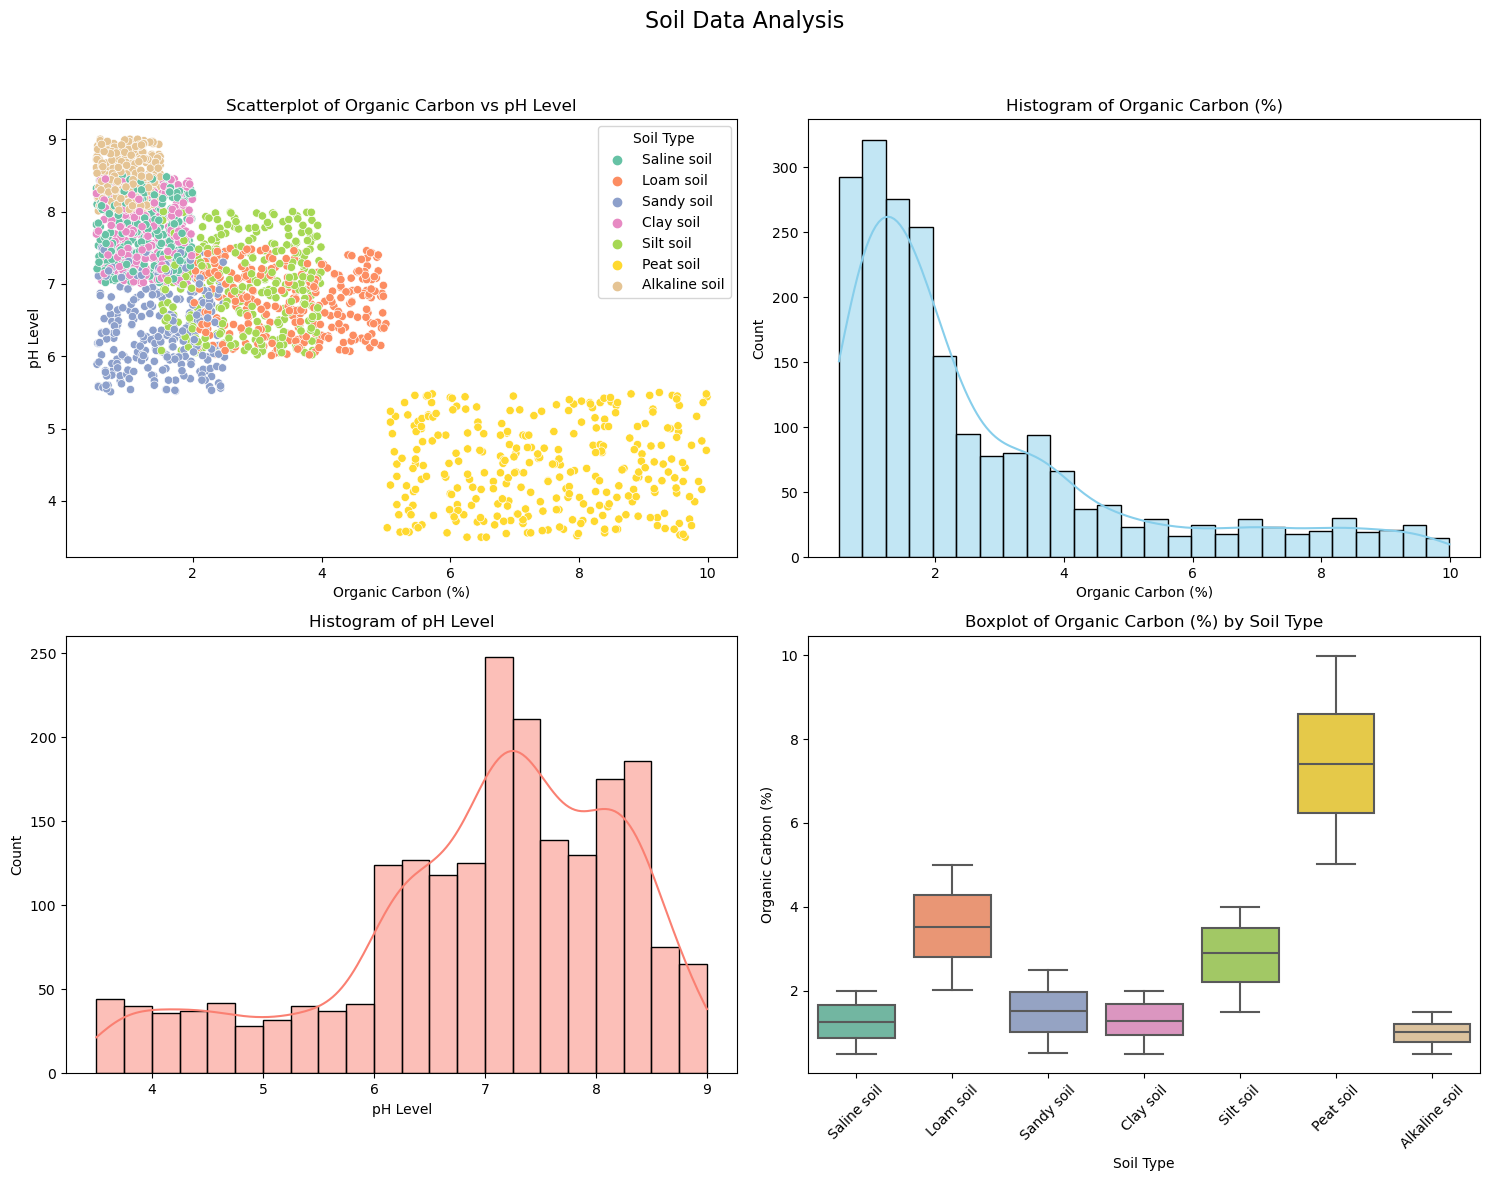

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Soil_Dataframe.csv')

# Set up the figure and axes for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Soil Data Analysis', fontsize=16)

# Scatterplot of Organic Carbon (%) vs pH Level, colored by Soil Type
sns.scatterplot(data=df, x='Organic Carbon (%)', y='pH Level', hue='Soil Type', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Scatterplot of Organic Carbon vs pH Level')

# Histogram of Organic Carbon (%)
sns.histplot(df['Organic Carbon (%)'], kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Organic Carbon (%)')

# Histogram of pH Level
sns.histplot(df['pH Level'], kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of pH Level')

# Boxplot of Organic Carbon (%) by Soil Type
sns.boxplot(data=df, x='Soil Type', y='Organic Carbon (%)', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Organic Carbon (%) by Soil Type')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
plt.savefig('Soil_Data_Analysis.png')

# Show the plots
plt.show()


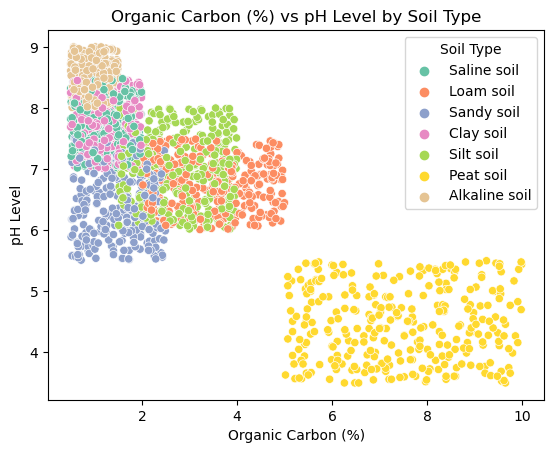

In [11]:
sns.scatterplot(data=df, x='Organic Carbon (%)', y='pH Level', hue='Soil Type', palette='Set2')
plt.title('Organic Carbon (%) vs pH Level by Soil Type')
plt.xlabel('Organic Carbon (%)')
plt.ylabel('pH Level')
plt.legend(title='Soil Type')
# plt.savefig('Organic Carbon (%) vs pH Level by Soil Type.png')
plt.show()


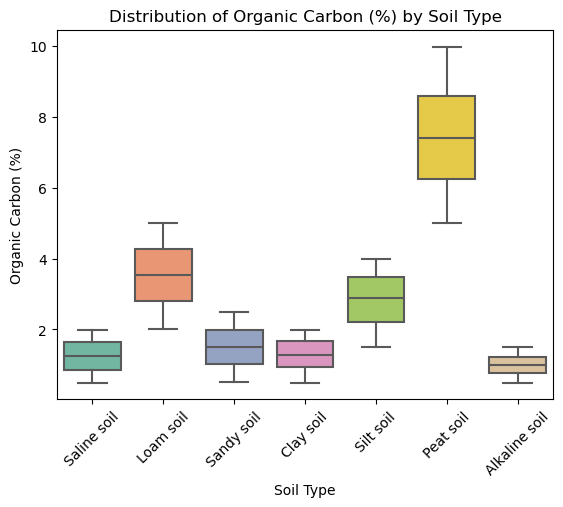

In [12]:
sns.boxplot(data=df, x='Soil Type', y='Organic Carbon (%)', palette='Set2')
plt.title('Distribution of Organic Carbon (%) by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Organic Carbon (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.savefig('Distribution of Organic Carbon (%) by Soil Type.png')
plt.show()



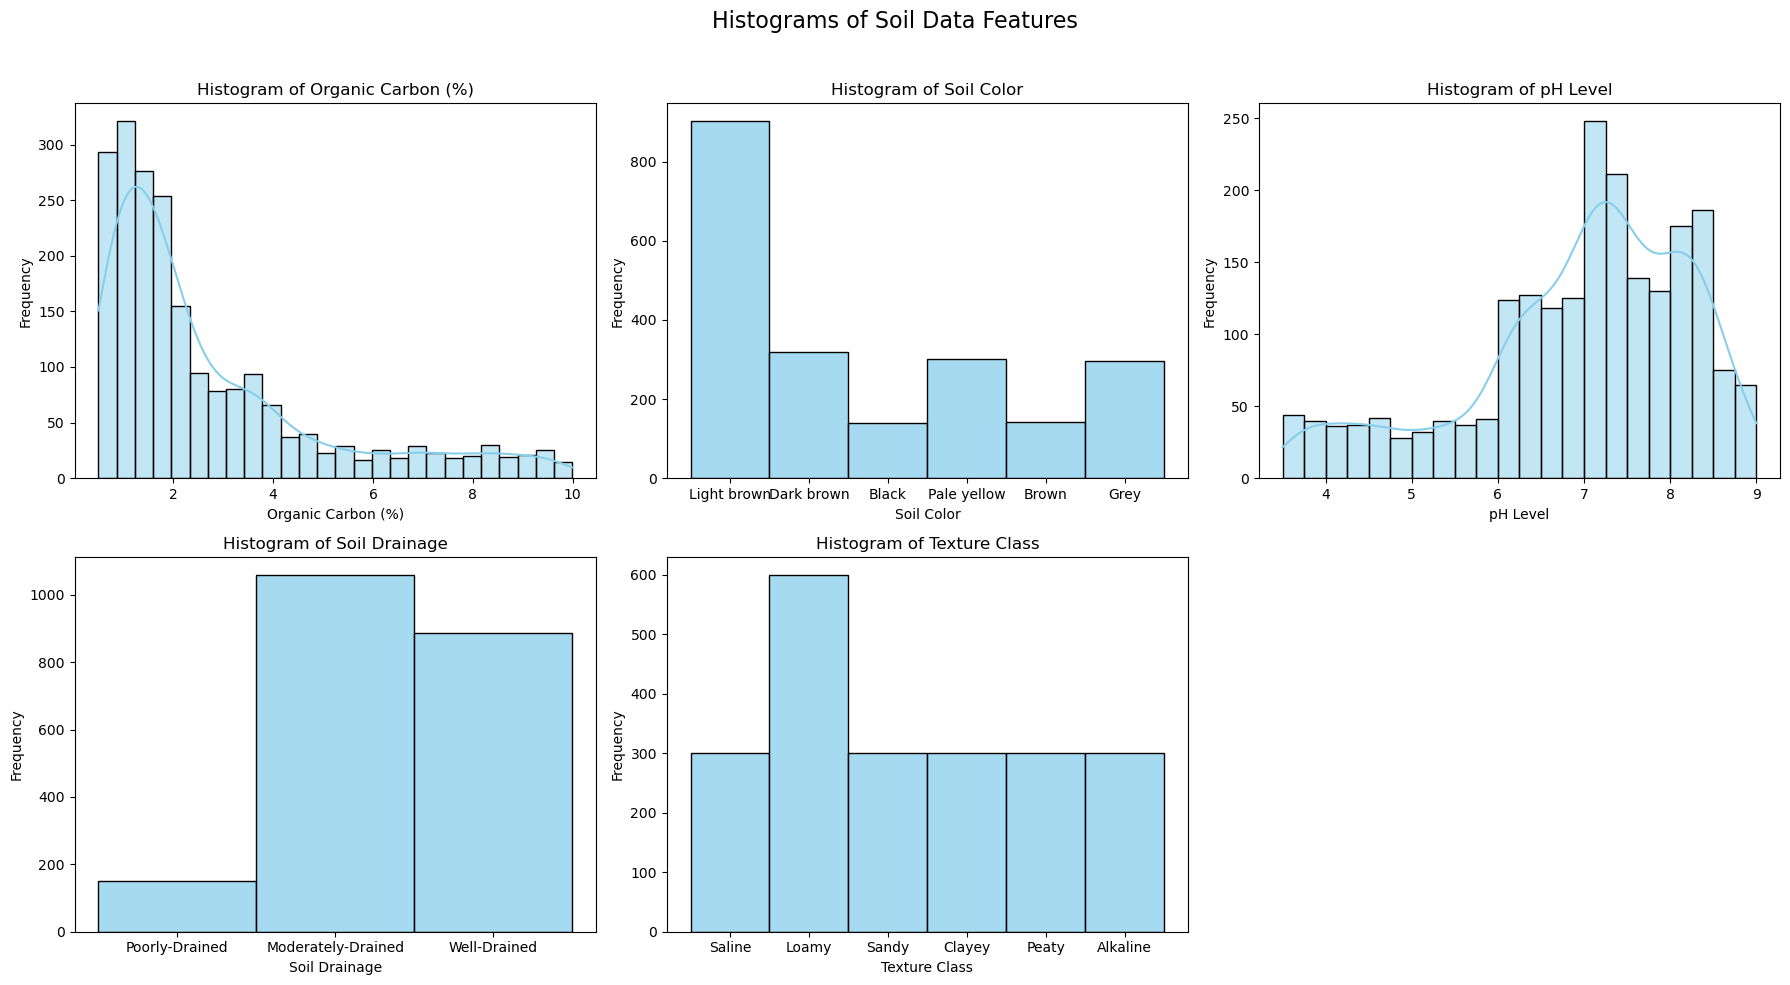

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Soil_Dataframe.csv')

# Set up the figure and axes for the plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Create a 2x3 grid of plots
fig.suptitle('Histograms of Soil Data Features', fontsize=16)

# Histogram: Organic Carbon (%)
sns.histplot(df['Organic Carbon (%)'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Organic Carbon (%)')
axes[0, 0].set_xlabel('Organic Carbon (%)')
axes[0, 0].set_ylabel('Frequency')

# Histogram: Soil Color (categorical data)
sns.histplot(df['Soil Color'].astype(str), kde=False, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Soil Color')
axes[0, 1].set_xlabel('Soil Color')
axes[0, 1].set_ylabel('Frequency')

# Histogram: pH Level
sns.histplot(df['pH Level'], kde=True, color='skyblue', ax=axes[0, 2])
axes[0, 2].set_title('Histogram of pH Level')
axes[0, 2].set_xlabel('pH Level')
axes[0, 2].set_ylabel('Frequency')

# Histogram: Soil Drainage (categorical data)
sns.histplot(df['Soil Drainage'].astype(str), kde=False, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Soil Drainage')
axes[1, 0].set_xlabel('Soil Drainage')
axes[1, 0].set_ylabel('Frequency')

# Histogram: Texture Class (categorical data)
sns.histplot(df['Texture Class'].astype(str), kde=False, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Texture Class')
axes[1, 1].set_xlabel('Texture Class')
axes[1, 1].set_ylabel('Frequency')

# Remove empty subplot (if any)
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle

# Save and show the plot
plt.savefig('Histograms_Soil_Data.png')
plt.show()


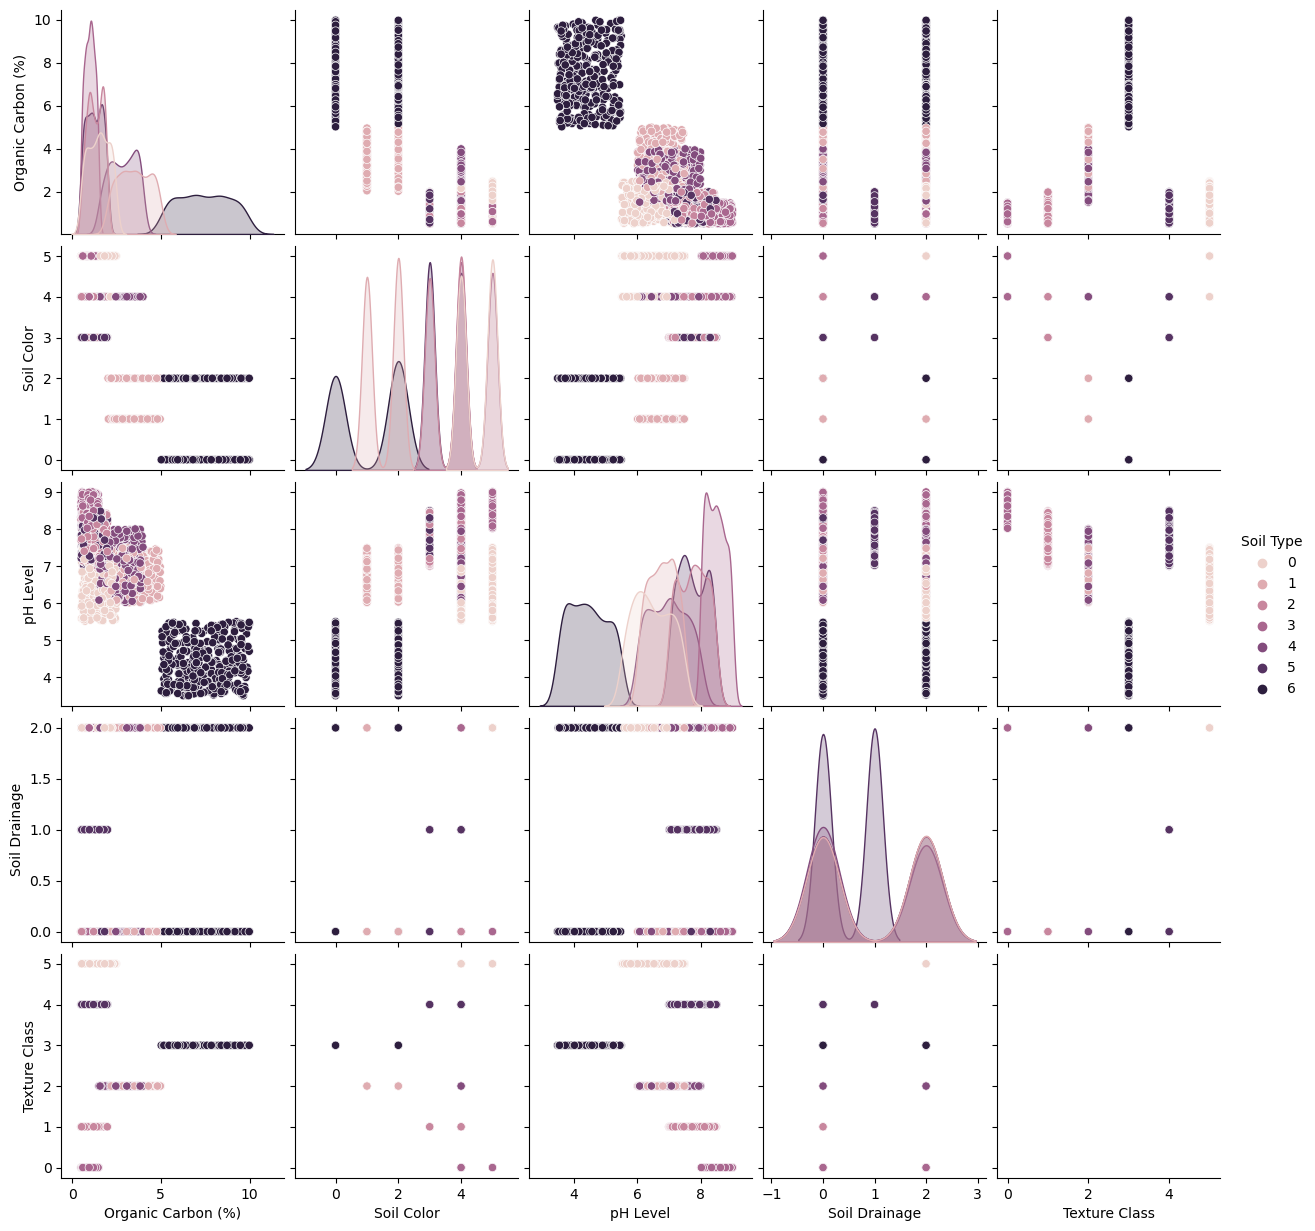

In [14]:
sns.pairplot(data, hue='Soil Type', diag_kind='kde')
plt.show()

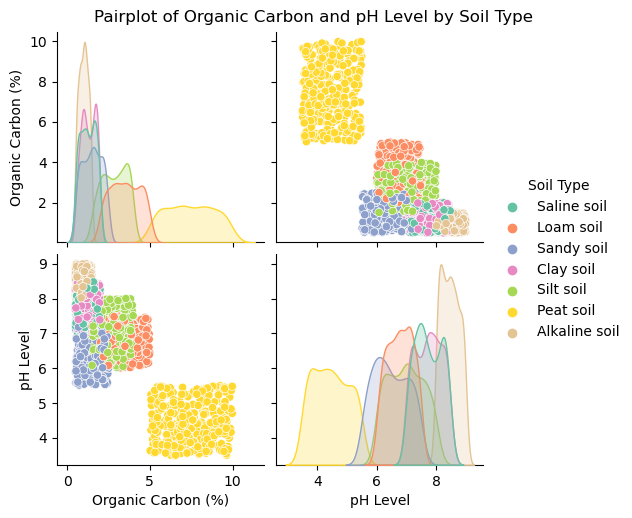

In [15]:
sns.pairplot(df[['Organic Carbon (%)', 'pH Level', 'Soil Type']], hue='Soil Type', palette='Set2')
plt.suptitle('Pairplot of Organic Carbon and pH Level by Soil Type', y=1.02)
plt.show()

In [16]:
data.describe()

,Organic Carbon (%),Soil Color,pH Level,Soil Drainage,Texture Class,Soil Type
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,2.690748,3.230952,6.951957,0.918095,2.428571,3.000000
std,2.259495,1.404238,1.293139,0.959869,1.591169,2.000476
min,0.500000,0.000000,3.500000,0.000000,0.000000,0.000000
25%,1.110000,2.000000,6.290000,0.000000,1.000000,1.000000
50%,1.800000,4.000000,7.170000,0.000000,2.000000,3.000000
75%,3.500000,4.000000,7.962500,2.000000,4.000000,5.000000
max,9.990000,5.000000,9.000000,2.000000,5.000000,6.000000


In [17]:
x=data.drop(['Soil Type'],axis=1)

In [18]:
y=data['Soil Type']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=200)

## LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic_model=LogisticRegression()

In [23]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [24]:
logistic_model.score(x_train,y_train)

0.9979591836734694

In [25]:
logistic_model.score(x_test,y_test)

0.9968253968253968

## DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree_model= DecisionTreeClassifier()

In [29]:
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
dtree_model.score(x_train,y_train)

1.0

In [31]:
dtree_model.score(x_test,y_test)

0.9984126984126984

## RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
forest_model= RandomForestClassifier(n_estimators=50,random_state=20)

In [35]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=20)

In [36]:
forest_model.score(x_train,y_train)

1.0

In [37]:
forest_model.score(x_test,y_test)

1.0

## K NEAREST NEIGHBOUR (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model= KNeighborsClassifier()

In [41]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
knn_model.score(x_train,y_train)

1.0

In [43]:
knn_model.score(x_test,y_test)

1.0

## SUPPORT VECTOR MECHANISM (SVM)

In [45]:
from sklearn.svm import SVC

In [46]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

1.0

In [47]:
svm.score(x_train,y_train)

1.0

In [48]:
svm1=SVC(kernel='poly',degree=3,C=5,gamma='auto')  
svm1.fit(x_train,y_train)
svm1.score(x_test,y_test)

1.0

In [49]:
svm1.score(x_train,y_train)

1.0

In [50]:
svm2=SVC(kernel='sigmoid')
svm2.fit(x_train,y_train)
svm2.score(x_test,y_test)

0.5126984126984127

In [51]:
svm2.score(x_train,y_train)

0.5571428571428572

In [52]:
svm3=SVC(kernel='rbf')
svm3.fit(x_train,y_train)
svm3.score(x_test,y_test)

1.0

In [53]:
svm3.score(x_train,y_train)

1.0

In [54]:
svm4=SVC()
svm4.fit(x_train,y_train)
svm4.score(x_test,y_test)

1.0

## NAIVE BAYES (GaussianNB)

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gaus_model=GaussianNB()

In [58]:
gaus_model.fit(x_train,y_train)

GaussianNB()

In [59]:
gaus_model.score(x_train,y_train)

1.0

In [60]:
gaus_model.score(x_test,y_test)

1.0

## ENSEMBLE MODEL

#### AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost= AdaBoostClassifier(n_estimators=400,base_estimator=base_estimator,learning_rate=0.3,random_state=10)

In [65]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=400, random_state=10)

In [66]:
adaboost.score(x_train,y_train)

0.9993197278911564

In [67]:
adaboost.score(x_test,y_test)

1.0

#### GradientBoosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
grad_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,random_state=25)

In [71]:
grad_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=25)

In [72]:
grad_model.score(x_train,y_train)

1.0

In [73]:
grad_model.score(x_test,y_test)

1.0

#### XGBClassifier

In [75]:
from xgboost import XGBClassifier

In [76]:
xg_model=XGBClassifier()

In [77]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [78]:
xg_model.score(x_train,y_train)

1.0

In [79]:
xg_model.score(x_test,y_test)

1.0

# CROSS VALIDATION

In [81]:
from sklearn.model_selection import KFold,StratifiedKFold
X=data.drop(['Soil Type'],axis=1)
y=data[['Soil Type']]

In [82]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return model.score(x_test,y_test)
    # return accuracy_score(y_test, predictions)

In [83]:
fold = KFold(n_splits=6)
log_score = []
dt_score = []
rf_score = []
knn_score = []
svm_score = []
nb_score = []
adb_score = []
xg_score=[]
gr_score = []

for train_index, test_index in fold.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_score.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeClassifier(max_depth=7), x_train, x_test, y_train, y_test))
    rf_score.append(get_score(RandomForestClassifier(random_state=34), x_train, x_test, y_train, y_test))
    knn_score.append(get_score(KNeighborsClassifier(), x_train, x_test, y_train, y_test))
    svm_score.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    nb_score.append(get_score(GaussianNB(), x_train, x_test, y_train, y_test))
    adb_score.append(get_score(AdaBoostClassifier(), x_train, x_test, y_train, y_test))
    xg_score.append(get_score(XGBClassifier(), x_train, x_test, y_train, y_test))
    gr_score.append(get_score(GradientBoostingClassifier(), x_train, x_test, y_train, y_test))

# You can now analyze the scores stored in the lists
print("Logistic Regression scores:",log_score)
print("Decision Tree scores:",dt_score)
print("Random Forest scores:",rf_score)
print("KNN scores:",knn_score)
print("Naive Bayes scores:",nb_score)
print('SVM score: ',svm_score)
print("AdaBoost scores:",adb_score)
print("XGBoost scores:",xg_score)
print("Gradient Boosting scores:",gr_score)

Logistic Regression scores: [1.0, 0.9971428571428571, 1.0, 1.0, 0.9971428571428571, 0.9971428571428571]
Decision Tree scores: [1.0, 1.0, 1.0, 1.0, 0.9971428571428571, 1.0]
Random Forest scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
KNN scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Naive Bayes scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
SVM score:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
AdaBoost scores: [0.6971428571428572, 0.6914285714285714, 0.5514285714285714, 0.5457142857142857, 0.5228571428571429, 0.5485714285714286]
XGBoost scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Gradient Boosting scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [84]:
fold = StratifiedKFold(n_splits=6)
log_score = []
dt_score = []
rf_score = []
knn_score = []
svm_score = []
nb_score = []
adb_score = []
xg_score=[]
gr_score = []

for train_index, test_index in fold.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log_score.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    dt_score.append(get_score(DecisionTreeClassifier(max_depth=7), x_train, x_test, y_train, y_test))
    rf_score.append(get_score(RandomForestClassifier(random_state=34), x_train, x_test, y_train, y_test))
    knn_score.append(get_score(KNeighborsClassifier(), x_train, x_test, y_train, y_test))
    svm_score.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    nb_score.append(get_score(GaussianNB(), x_train, x_test, y_train, y_test))
    adb_score.append(get_score(AdaBoostClassifier(), x_train, x_test, y_train, y_test))
    xg_score.append(get_score(XGBClassifier(), x_train, x_test, y_train, y_test))
    gr_score.append(get_score(GradientBoostingClassifier(), x_train, x_test, y_train, y_test))

# Now we can analyze the scores as needed
print("Logistic Regression Scores:",log_score)
print("Decision Tree Scores:",dt_score)
print("Random Forest Scores:",rf_score)
print("K-Nearest Neighbors Scores:",knn_score)
print("SVM Scores:",svm_score)
print("Naive Bayes Scores:",nb_score)
print("AdaBoost Scores:",adb_score)
print("XGBoost scores:",xg_score)
print("Gradient Boosting Scores:",gr_score)

Logistic Regression Scores: [1.0, 0.9971428571428571, 1.0, 1.0, 0.9971428571428571, 0.9971428571428571]
Decision Tree Scores: [1.0, 1.0, 1.0, 0.9971428571428571, 1.0, 1.0]
Random Forest Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
K-Nearest Neighbors Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
SVM Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Naive Bayes Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
AdaBoost Scores: [0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5685714285714286, 0.5685714285714286, 0.5714285714285714]
XGBoost scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Gradient Boosting Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Selected Model Creation Algorithm is RandomForestClassifier

##### GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [88]:
model_params={'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10],'max_depth': [None, 10, 20, 30] }}

In [89]:
gds= GridSearchCV(model_params['model'],model_params['params'],cv=5,return_train_score=True)

In [90]:
gds.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [1, 5, 10]},
             return_train_score=True)

In [91]:
gds.best_score_

1.0

In [92]:
gds.best_params_

{'max_depth': None, 'n_estimators': 10}

In [93]:
gds.predict([[1.5,3,6.6,1,3]])

array([4], dtype=int64)

In [94]:
y_pred=gds.predict(x_test)
y_pred

array([5, 5, 3, 5, 1, 1, 3, 3, 5, 1, 1, 5, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1,
       5, 3, 3, 3, 1, 1, 1, 1, 5, 5, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 3, 3,
       3, 1, 3, 1, 1, 0, 2, 0, 2, 0, 5, 0, 6, 0, 0, 6, 5, 3, 3, 4, 5, 3,
       3, 2, 6, 1, 3, 6, 4, 2, 6, 4, 2, 5, 5, 0, 6, 0, 4, 0, 2, 5, 6, 3,
       0, 6, 4, 1, 5, 6, 0, 2, 5, 4, 6, 6, 4, 3, 0, 1, 2, 0, 2, 0, 2, 0,
       5, 4, 5, 6, 5, 1, 2, 1, 0, 0, 1, 5, 6, 5, 4, 2, 0, 2, 6, 4, 1, 6,
       2, 2, 3, 6, 1, 4, 1, 5, 5, 4, 4, 1, 6, 2, 3, 4, 0, 2, 6, 6, 2, 1,
       3, 3, 5, 3, 6, 6, 5, 1, 2, 5, 6, 3, 1, 5, 2, 4, 4, 6, 6, 1, 1, 5,
       1, 2, 4, 3, 4, 4, 5, 4, 5, 6, 2, 4, 2, 5, 0, 2, 6, 5, 6, 3, 5, 0,
       6, 4, 5, 4, 6, 0, 4, 6, 0, 2, 5, 2, 0, 4, 5, 4, 5, 0, 0, 6, 4, 2,
       4, 5, 6, 3, 0, 2, 0, 2, 1, 0, 6, 2, 0, 3, 0, 2, 6, 6, 4, 1, 3, 0,
       3, 0, 2, 4, 2, 2, 6, 3, 0, 4, 3, 4, 2, 1, 1, 5, 5, 2, 6, 0, 6, 4,
       6, 5, 4, 4, 0, 0, 2, 5, 3, 4, 2, 3, 3, 0, 1, 6, 4, 4, 6, 6, 5, 3,
       0, 3, 4, 4, 4, 0, 3, 6, 2, 0, 2, 5, 1, 4, 2,

In [95]:
y_test

,Soil Type
1628,5
1652,5
1684,3
1685,5
1687,1
...,...
2095,2
2096,0
2097,6
2098,5


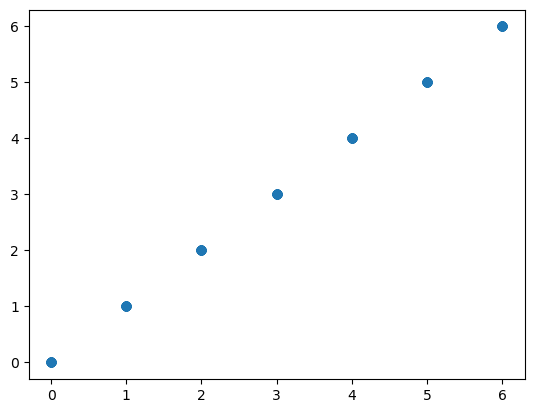

In [96]:
plt.scatter(y_test,y_pred)

In [97]:
pd.DataFrame(y_test,y_pred)

,Soil Type
5,NaN
5,NaN
3,NaN
5,NaN
1,NaN
...,...
2,NaN
0,NaN
6,NaN
5,NaN


In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [99]:
accuracy_score(y_test,y_pred)

1.0

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



In [101]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[50,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  0,  0, 50]], dtype=int64)

In [102]:
import seaborn as sns

Text(70.72222222222221, 0.5, 'predicted')

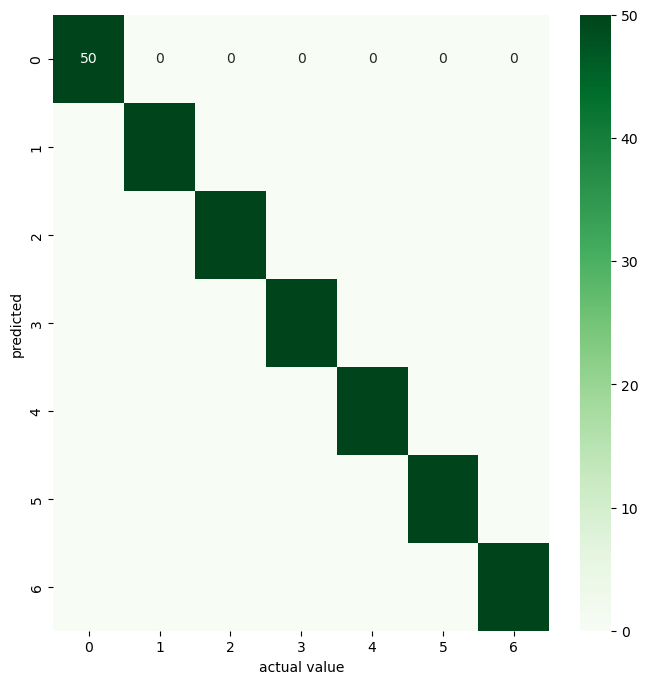

In [103]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap='Greens')
plt.xlabel('actual value')
plt.ylabel('predicted')

In [202]:
def run_model():
    Organic_Carbon = float(input('Enter organic carbon content (Range: 0.5-10.0): '))
    Soil_Color = input("Enter the soil color ('Pale yellow', 'Light brown', 'Dark brown', 'Brown', 'Grey', 'Black'): ")
    pH_Level = float(input('Enter the pH level (Range: 3.5-9.0): '))
    Soil_Drainage = input("Enter the soil drainage ('Well-Drained','Moderately-Drained','Poorly-Drained'): ")
    Texture_Class = input("Enter the texture class of soil ('Sandy','Loamy','Clayey','Peaty','Saline','Alkaline'): ")

    Soil_Color_encoded = le.transform([Soil_Color])[0]
    Soil_Drainage_encoded = le1.transform([Soil_Drainage])[0]
    Texture_Class_encoded = le2.transform([Texture_Class])[0]

   
    
    features = np.array([[Organic_Carbon, Soil_Color_encoded, pH_Level, Soil_Drainage_encoded, Texture_Class_encoded]])
    Result = gds.predict(features)
    print(Result)
    

    if Result == 0:
        print('The predicted soil type is SANDY SOIL')
        print('The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:')
        print("""
            • Fruits: Melons (e.g., watermelon), strawberries, peaches.
            • Vegetables: Carrots, radishes, onions, peppers.
            • Plants: Cacti, succulents, lavender.

            Sandy soil drains quickly and warms up fast in spring, making it suitable for crops that thrive in warm, well-draining conditions.
            """)
    elif Result == 1:
        print('The predicted soil type is LOAM SOIL')
        print('The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:')
        print("""
            • Fruits: Apples, cherries, grapes.
            • Vegetables: : Tomatoes, lettuce, beans, peas.
            • Plants: Roses, most herbs, many ornamentals.

            Loam soil is ideal for a wide range of plants due to its balanced texture, good drainage, and nutrient retention.
            """)
    elif Result == 4:
        print('The predicted soil type is SILT SOIL')
        print('The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:')
        print("""
            • Fruits: Blueberries, cranberries.
            • Vegetables: : Asparagus, celery.
            • Plants: Alders, willows, certain grasses

            Silt soil is fertile and retains water well, making it suitable for crops that prefer moist conditions.
            """)
    elif Result == 2:
        print('The predicted soil type is CLAY SOIL')
        print('The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:')
        print("""
            • Fruits: Pears, plums, apricots.
            • Vegetables: : Potatoes, cabbage, broccoli, spinach.
            • Plants: Hostas, astilbes, Japanese maples.

            Clay soil retains moisture well but can be heavy and compact, so plants that tolerate wet conditions or have deep roots are suitable.
            """)
    elif Result == 6:
        print('The predicted soil type is PEAT SOIL')
        print('The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:')
        print("""
            • Fruits: Lingonberries, bog cranberries.
            • Vegetables: : Rhubarb, horseradish.
            • Plants: Bog rosemary, pitcher plants, sphagnum moss.

            Peat soil is acidic and nutrient-poor, suitable for plants adapted to boggy or wetland conditions.
            """)
    elif Result == 5:
        print('The predicted soil type is SALINE SOIL')
        print('The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:')
        print("""
            • Fruits: Dates, pomegranates.
            • Vegetables: : Spinach, Swiss chard.
            • Plants: Saltbushes, mangroves, certain halophytes.

            Saline soil requires plants that can tolerate high salt levels and may need special management practices to maintain productivity.
            """)
    elif Result == 3:
        print('The predicted soil type is ALKALINE SOIL')
        print('The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:')
        print("""
            • Fruits: Apples, pears, plums, grapes, figs.
            • Vegetables: : Beets, carrots, broccoli, cabbage, cauliflower, onions.
            • Plants: Lavender, sage, thyme, rosemary, oregano.

            Alkaline soil requires plants that can tolerate high pH levels and may need specific adjustments to optimize growth and nutrient availability.
            """)
run_model()

Enter organic carbon content (Range: 0.5-10.0):  5
Enter the soil color ('Pale yellow', 'Light brown', 'Dark brown', 'Brown', 'Grey', 'Black'):  Dark brown
Enter the pH level (Range: 3.5-9.0):  7
Enter the soil drainage ('Well-Drained','Moderately-Drained','Poorly-Drained'):  Moderately-Drained
Enter the texture class of soil ('Sandy','Loamy','Clayey','Peaty','Saline','Alkaline'):  Saline


[1]
The predicted soil type is LOAM SOIL
The following are the suitable fruits, vegetables, and plants appropriate for cultivation on this type of soil:

            • Fruits: Apples, cherries, grapes.
            • Vegetables: : Tomatoes, lettuce, beans, peas.
            • Plants: Roses, most herbs, many ornamentals.

            Loam soil is ideal for a wide range of plants due to its balanced texture, good drainage, and nutrient retention.
            
